In [50]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pylab as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches
import seaborn as sns

In [2]:
df = pd.read_csv('data/car_loan.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 64 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [3]:
df0=df[df['loan_default']==0]
df1=df[df['loan_default']==1]

In [79]:
df0.describe()['ltv']

count    182543.000000
mean         74.154093
std          11.681455
min          10.030000
25%          68.020000
50%          76.000000
75%          83.160000
max          95.000000
Name: ltv, dtype: float64

In [80]:
df1.describe()['ltv']

count    50611.000000
mean        76.883322
std         10.327771
min         15.300000
25%         72.055000
50%         79.060000
75%         84.680000
max         95.000000
Name: ltv, dtype: float64

In [134]:
df['Employment.Type'] = df['Employment.Type'].fillna("Unknown")

In [91]:
a = df['AVERAGE.ACCT.AGE']
a = pd.DataFrame(a)
a = a['AVERAGE.ACCT.AGE'].str.split(' ',expand = True)
a.columns= ['years','months']
a.years = a.years.str[:-3]
a.months = a.months.str[:-3]
a.years = a.years.astype('int')
a.months = a.months.astype('int')
a['AVERAGE.ACCT.AGE'] = a.years*12+a.months
df['AVERAGE.ACCT.AGE']=a['AVERAGE.ACCT.AGE']
#df = pd.concat([df,a.num_mon],axis = 1)
b = df['CREDIT.HISTORY.LENGTH']
b = pd.DataFrame(b)
b = b['CREDIT.HISTORY.LENGTH'].str.split(' ',expand = True)
b.columns= ['years','months']
b.years = b.years.str[:-3]
b.months = b.months.str[:-3]
b.years = b.years.astype('int')
b.months = b.months.astype('int')
b['CREDIT.HISTORY.LENGTH'] = b.years*12+a.months
df['CREDIT.HISTORY.LENGTH']=b['CREDIT.HISTORY.LENGTH']
#df = pd.concat([df,b.Credit_num_mon],axis = 1)

In [92]:
from datetime import date
df['Date.of.Birth'] = pd.to_datetime(df['Date.of.Birth'])
df['DisbursalDate'] = pd.to_datetime(df['DisbursalDate'])
def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df['Date.of.Birth'] = df['Date.of.Birth'].apply(calculate_age)
df['DisbursalDate'] = df['DisbursalDate'].apply(calculate_age)

In [93]:
df['total_overdue_accts'] = df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df['total_current_balance'] = df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df['total_sanctioned_amount'] = df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df['total_EMI'] = df['PRIMARY.INSTAL.AMT']+df['SEC.INSTAL.AMT']
df['total_no_of_accts']=df['PRI.NO.OF.ACCTS']+df['SEC.NO.OF.ACCTS']
df['total_active_accts']=df['PRI.ACTIVE.ACCTS']+df['SEC.ACTIVE.ACCTS']
df['total_inactive_accts']=df['total_no_of_accts']-df['total_active_accts']

In [95]:
X_numCol=['disbursed_amount',
'asset_cost',
'ltv','Employee_code_ID',
'PERFORM_CNS.SCORE',
'NEW.ACCTS.IN.LAST.SIX.MONTHS',
'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','NO.OF_INQUIRIES','Date.of.Birth','DisbursalDate',
'AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH',
'total_overdue_accts','total_current_balance','total_sanctioned_amount','total_EMI',
'total_no_of_accts','total_active_accts','total_inactive_accts']

In [106]:
featuresS=['SEC.OVERDUE.ACCTS','SEC.CURRENT.BALANCE','SEC.SANCTIONED.AMOUNT',
          'SEC.INSTAL.AMT','SEC.NO.OF.ACCTS','SEC.ACTIVE.ACCTS']
featuresP=['PRI.OVERDUE.ACCTS','PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT','PRIMARY.INSTAL.AMT','PRI.NO.OF.ACCTS',
          'PRI.ACTIVE.ACCTS','DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS','AVERAGE.ACCT.AGE','CREDIT.HISTORY.LENGTH']

In [107]:
for i in featuresP:
    print (df[i].value_counts()[0]/len(df[i]))

0.8873062439417724
0.6077356596927352
0.5922952211842817
0.6841701193202776
0.5015998009899036
0.5876630896317455
0.9219614503718573
0.5119920739082323
0.511979206876142


In [102]:
for i in featuresS:
    print (df[i].value_counts()[0]/len(df[i]))

0.9942655926983882
0.9855717680159894
0.9839762560367825
0.9904912632852106
0.9748449522633109
0.9836288461703423


/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

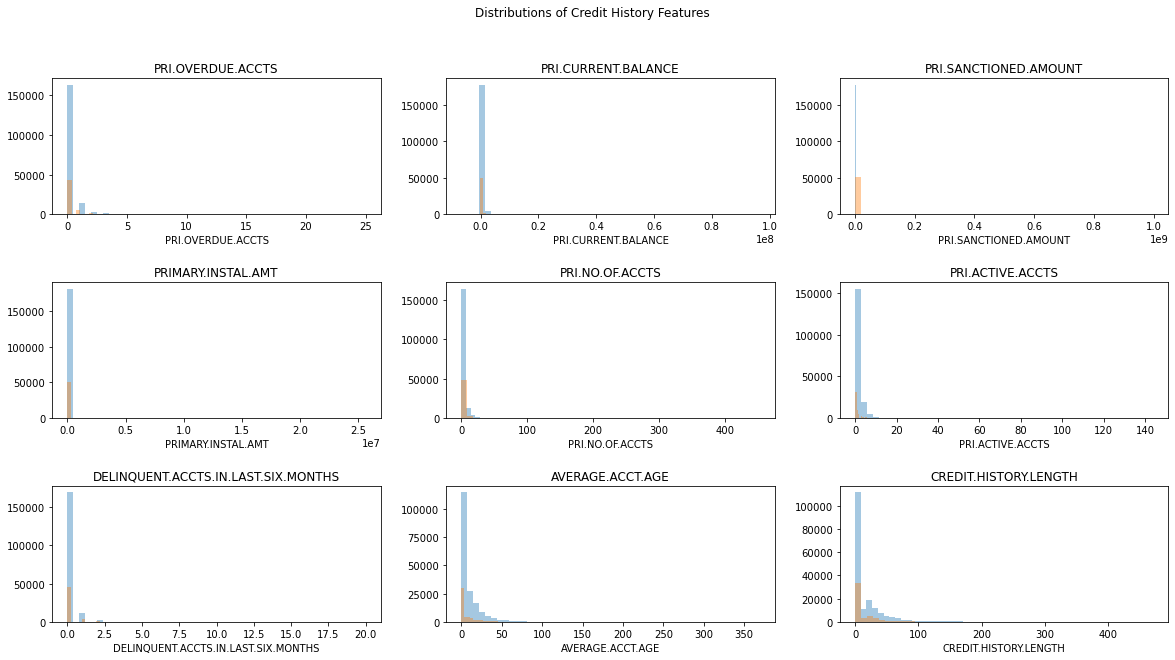

In [98]:
fig, axes = plt.subplots(ncols=3, nrows=3,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Credit History Features')
for i, ax in zip(featuresP, axes.flat):
    sns.distplot(df[df['loan_default']==0][i],kde=False, ax=ax)
    sns.distplot(df[df['loan_default']==1][i],kde=False,ax=ax)
    ax.set(title=str(i))
plt.show()

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

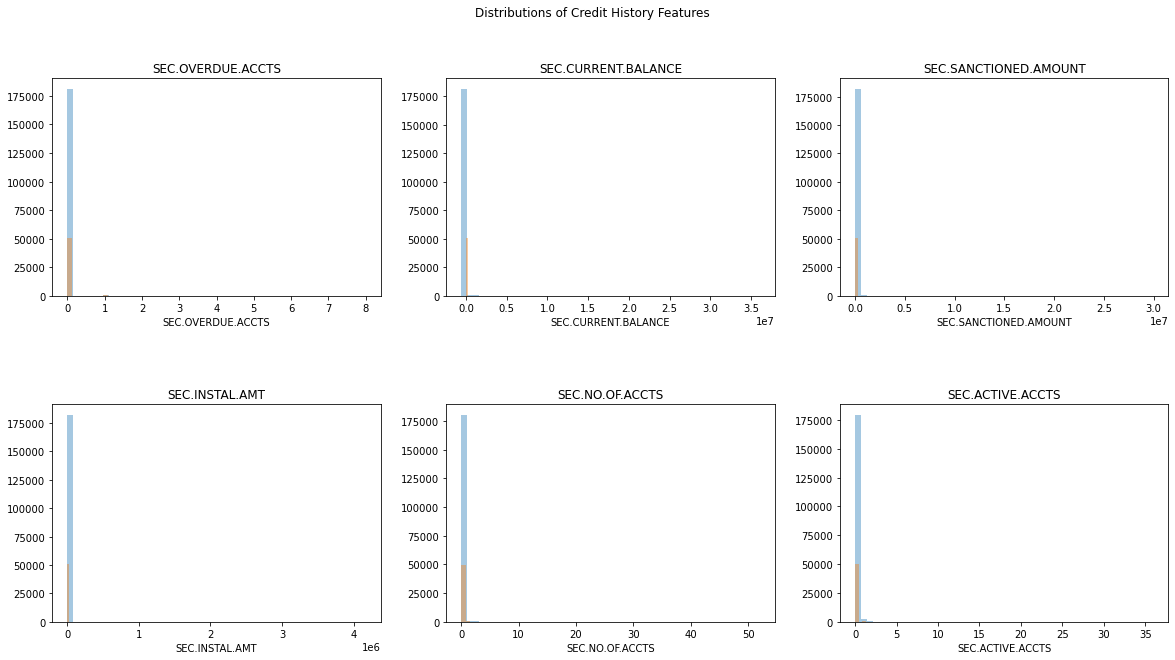

In [83]:
fig, axes = plt.subplots(ncols=3, nrows=2,figsize=(20,10))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Credit History Features')
for i, ax in zip(featuresS, axes.flat):
    sns.distplot(df[df['loan_default']==0][i],kde=False, ax=ax)
    sns.distplot(df[df['loan_default']==1][i],kde=False,ax=ax)
    ax.set(title=str(i))
plt.show()

In [296]:
df['ID_provided'] = df.PAN_flag+df.VoterID_flag+df.Driving_flag+df.Passport_flag
df['ID_provided']=df['ID_provided'].apply(lambda x: 1 if x>=1 else 0)
df['ID_provided'].apply(lambda x: 1 if x>=1 else 0).unique()

array([0, 1])

In [297]:
df['Missing Features'] = (df == 0).astype(int).sum(axis=1)

In [298]:
df['Missing Features']

0         34
1         15
2         34
3         23
4         32
          ..
233149    17
233150    24
233151    34
233152    34
233153    34
Name: Missing Features, Length: 233154, dtype: int64

In [264]:
df0=df[df['loan_default']==0]
df1=df[df['loan_default']==1]

[(-2013721.0, 100000000.0)]

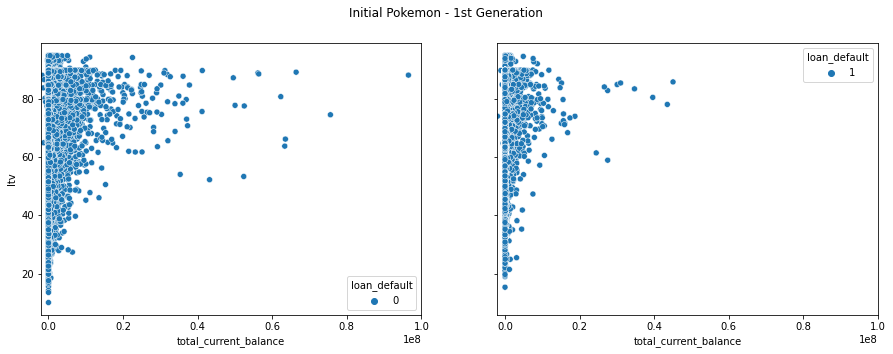

In [290]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Initial Pokemon - 1st Generation')
x1=sns.scatterplot(ax=axes[0], x='total_current_balance', y='ltv',hue='loan_default', data=df0)
x2=sns.scatterplot(ax=axes[1],x='total_current_balance', y='ltv',hue='loan_default', data=df1)
x2.set(xlim=(min(df1['total_current_balance']),100000000))
x1.set(xlim=(min(df1['total_current_balance']),100000000))

[(50000.0, 250000.0)]

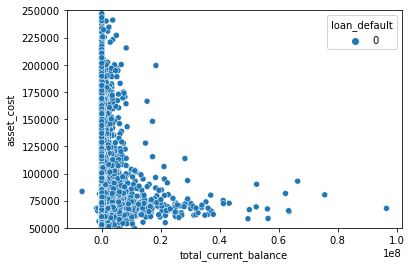

In [268]:
x=sns.scatterplot(x='total_current_balance', y='asset_cost',hue='loan_default', data=df0)
x.set(ylim=(50000, 250000))

Text(0.5, 1.0, 'ID Provided vs. Itv')

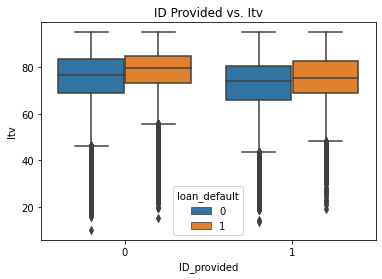

In [312]:
sns.boxplot(x='ID_provided',y='ltv',data=df, hue='loan_default') 
plt.title('ID Provided vs. Itv')

[Text(0, 0, 'Non-defaulter'), Text(1, 0, 'Defaulter')]

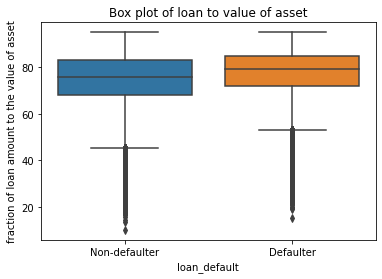

In [77]:
ax=sns.boxplot(x='loan_default',y='ltv',data=df) 
plt.ylabel('fraction of loan amount to the value of asset')
plt.title('Box plot of loan to value of asset')
ax.set_xticklabels(["Non-defaulter", "Defaulter"])

In [ ]:
X_catCol=['branch_id',
'supplier_id',
'manufacturer_id',
'Current_pincode_ID','Employment.Type','State_ID','MobileNo_Avl_Flag',
'Aadhar_flag',
'PAN_flag',
'VoterID_flag',
'Driving_flag',
'Passport_flag','PERFORM_CNS.SCORE.DESCRIPTION']

In [12]:
y = df['loan_default']
X = df.loc[:, df.columns != 'loan_default']

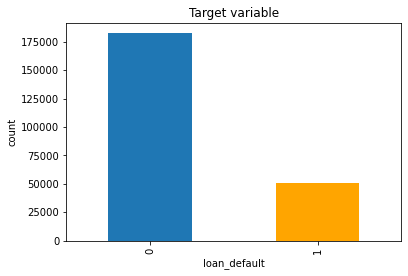

In [328]:
pd.value_counts(df['loan_default']).plot.bar(color=['tab:blue','Orange']) 
plt.ylabel('count')
plt.xlabel('loan_default')
plt.title('Target variable')
plt.show()

In [ ]:
df0=df[df['loan_default']]

In [34]:
df0=np.log(df['PRI.SANCTIONED.AMOUNT'])

In [12]:
dfsd=df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

In [8]:
dfsd1=df1['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

In [13]:
disct1={}
for i in dfsd1.index:
    disct1[i]=dfsd1[i]/dfsd[i]

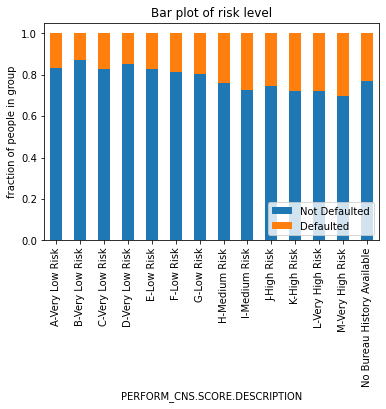

In [25]:
dfp=df[(df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: No Activity seen on the customer (Inactive)') &
       (df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: Sufficient History Not Available') &
       (df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: No Updates available in last 36 months') &
       (df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: More than 50 active Accounts found') &
       (df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: Not Enough Info available on the customer') &
       (df['PERFORM_CNS.SCORE.DESCRIPTION'] !='Not Scored: Only a Guarantor')]
count_matrix = dfp.groupby(['PERFORM_CNS.SCORE.DESCRIPTION', 'loan_default']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0) 
count_matrix_norm.plot(kind='bar', stacked=True) 
plt.ylabel('fraction of people in group') 
plt.legend(loc=4,labels=['Not Defaulted','Defaulted'])
plt.title('Bar plot of risk level')
plt.show()

In [16]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].unique()

array(['No Bureau History Available', 'I-Medium Risk', 'L-Very High Risk',
       'A-Very Low Risk',
       'Not Scored: Not Enough Info available on the customer',
       'D-Very Low Risk', 'M-Very High Risk', 'B-Very Low Risk',
       'C-Very Low Risk', 'E-Low Risk', 'H-Medium Risk', 'F-Low Risk',
       'K-High Risk',
       'Not Scored: No Activity seen on the customer (Inactive)',
       'Not Scored: Sufficient History Not Available',
       'Not Scored: No Updates available in last 36 months', 'G-Low Risk',
       'J-High Risk', 'Not Scored: Only a Guarantor',
       'Not Scored: More than 50 active Accounts found'], dtype=object)

0.014480135249366017

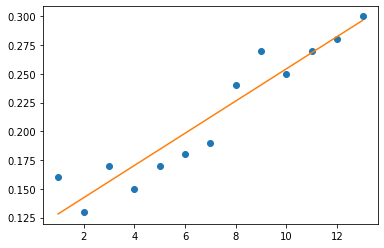

In [45]:
x = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13])
y = np.array([0.16,0.13,0.17,0.15,0.17,0.18,0.19,0.24,0.27,0.25,0.27,0.28,0.30])
plt.plot(x, y, 'o')
plt.plot(x, m*x + b)
y_predict=np.array([m*x + b for x in x])
sum(abs(y_predict-y))/len(x)

In [42]:
y_predict-y

array([-0.03175824,  0.01225275, -0.01373626,  0.02027473,  0.01428571,
        0.0182967 ,  0.02230769, -0.01368132, -0.02967033,  0.00434066,
       -0.00164835,  0.00236264, -0.00362637])

In [34]:
print(m)
print(b)

0.014010989010989012
0.11423076923076925


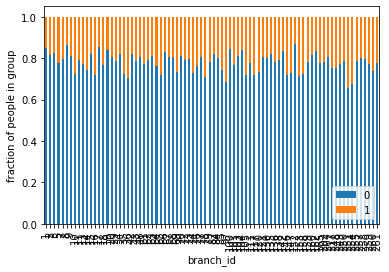

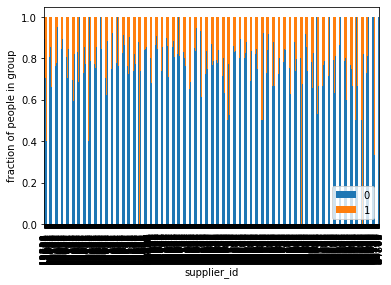

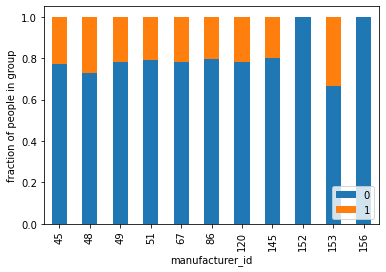

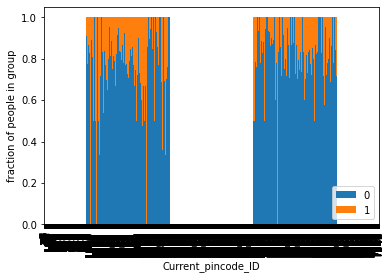

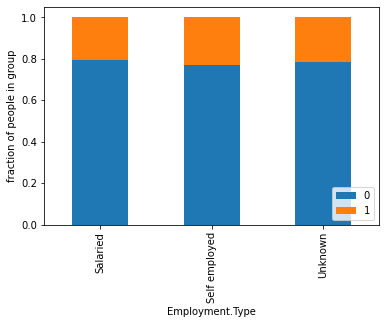

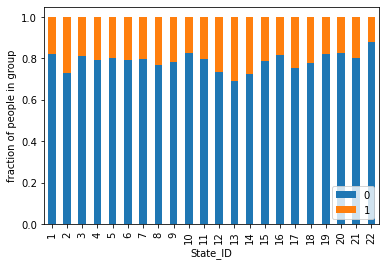

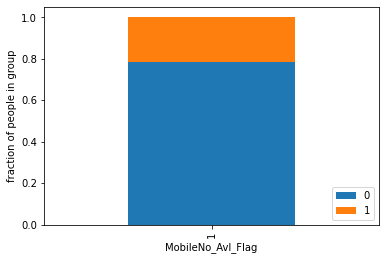

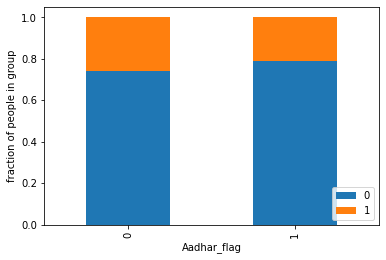

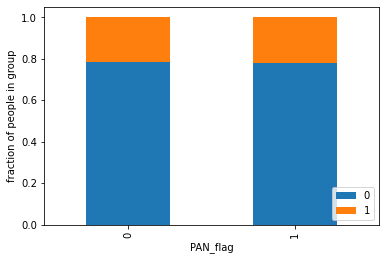

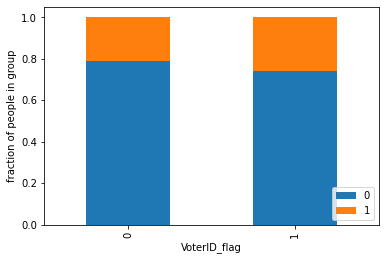

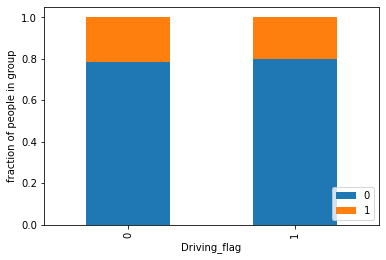

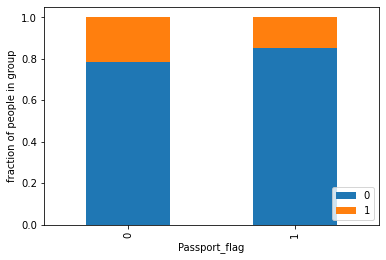

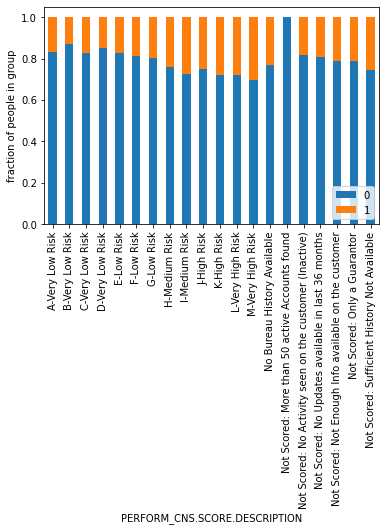

In [103]:
for i in X_catCol:
    count_matrix = df.groupby([i, 'loan_default']).size().unstack()
    count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0) 
    count_matrix_norm.plot(kind='bar', stacked=True) 
    plt.ylabel('fraction of people in group') 
    plt.legend(loc=4)
    plt.show()

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


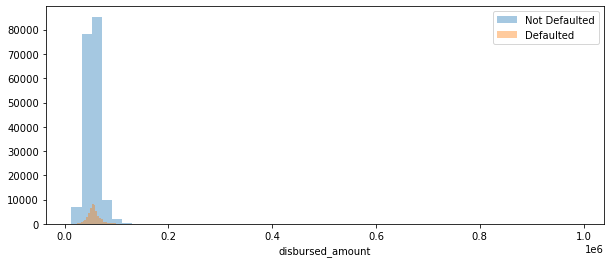

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


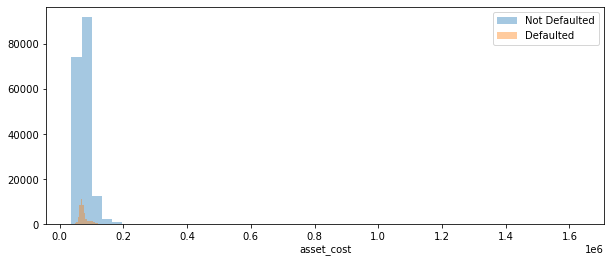

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


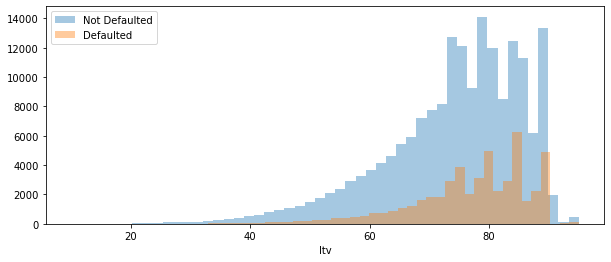

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


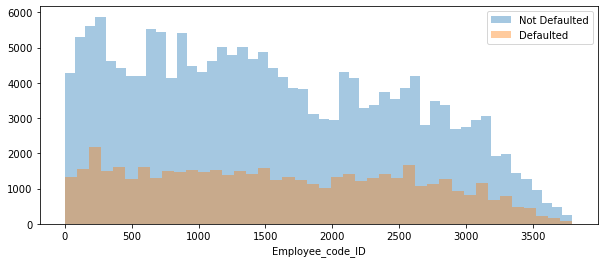

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


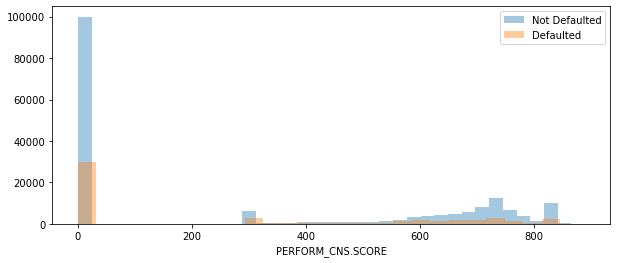

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


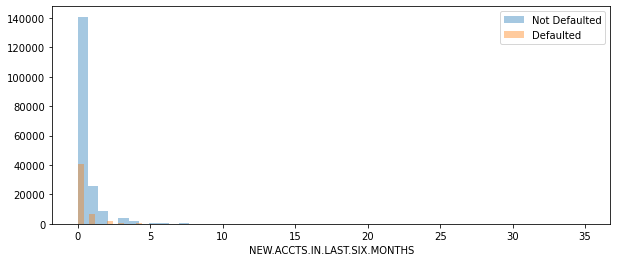

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


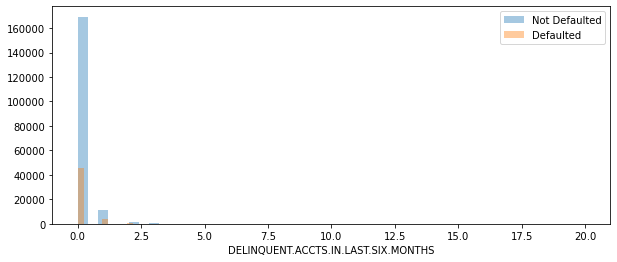

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


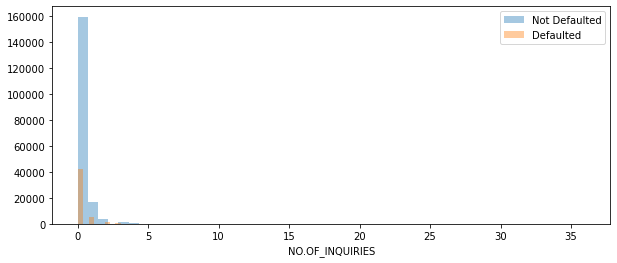

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


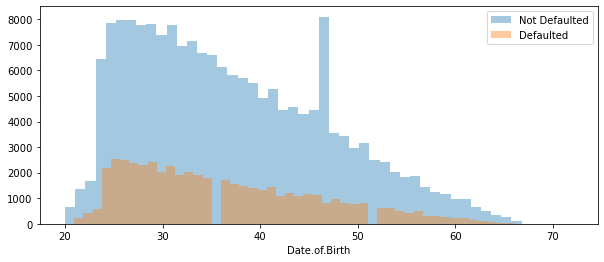

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


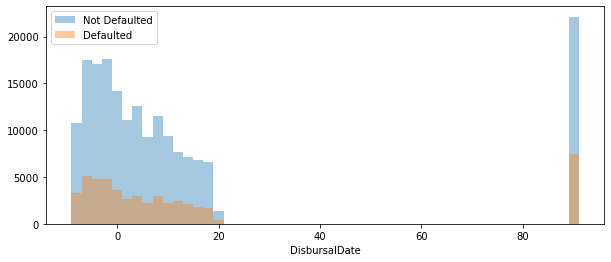

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


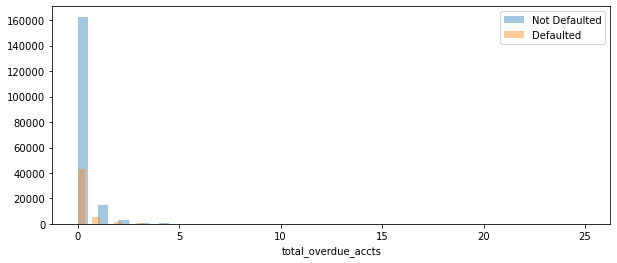

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


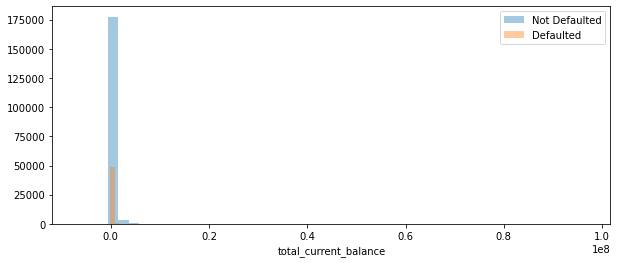

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


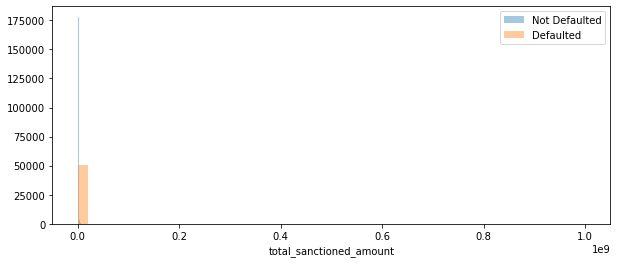

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


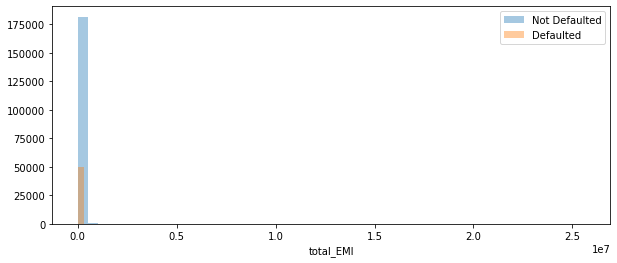

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


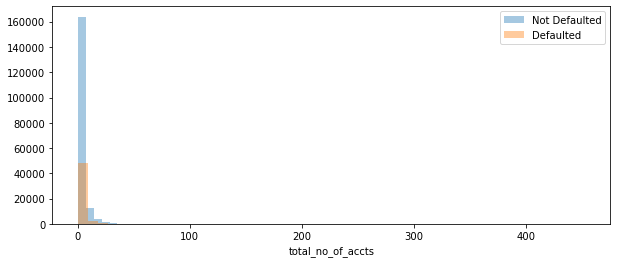

/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/hzr/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


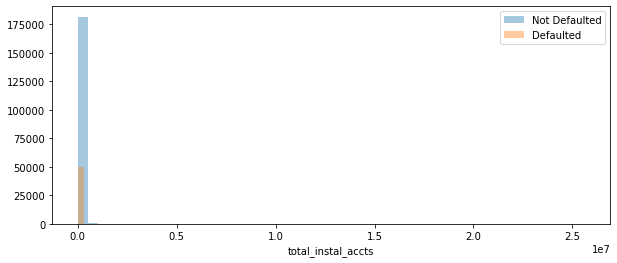

In [102]:
for i in X_numCol:
    plt.figure(figsize=(10,4))
    sns.distplot(df[df['loan_default']==0][i],kde=False)
    sns.distplot(df[df['loan_default']==1][i],kde=False)
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()